# Base Model: xgboost with fundamental features

In [1]:
%run Pre.py

/home/jiashen/env3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Re-split data
from sklearn.model_selection import train_test_split
training,testing = train_test_split(train,test_size=0.2,random_state=42)
del training['id']
del testing['id']
var_train = list(training.columns)
var_train.remove('price_doc')
var_train.remove('timestamp')
training_fe = training[var_train]
training_la = training['price_doc']
testing_fe = testing[var_train]

In [6]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 1,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
# For Training
dtraining = xgb.DMatrix(training_fe,training_la)
dtesting = xgb.DMatrix(testing_fe)

In [7]:
xgb_cvalid = xgb.cv(xgb_params, dtraining, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()

[0]	train-rmse:8.24498e+06	test-rmse:8.24982e+06
[50]	train-rmse:2.48661e+06	test-rmse:2.91882e+06
[100]	train-rmse:2.16055e+06	test-rmse:2.74953e+06
[150]	train-rmse:2.03008e+06	test-rmse:2.71326e+06
[200]	train-rmse:1.94112e+06	test-rmse:2.69607e+06
[250]	train-rmse:1.8608e+06	test-rmse:2.68369e+06
[300]	train-rmse:1.79354e+06	test-rmse:2.67625e+06
[350]	train-rmse:1.7351e+06	test-rmse:2.67119e+06


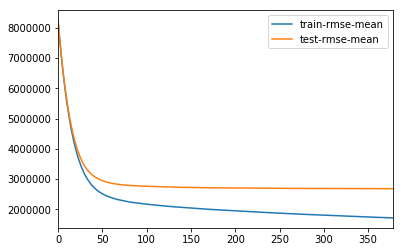

In [6]:
import matplotlib.pyplot as plt
plt.show()

In [8]:
## Train Splitted Dataset
num_boost_rounds = len(xgb_cvalid)
print(num_boost_rounds)
model = xgb.train(dict(xgb_params, silent=0), dtraining, num_boost_round= num_boost_rounds)
prediction = model.predict(dtesting)
Accuracy = mse(testing['price_doc'],prediction)
print(str(Accuracy**0.5))

358
2480941.40488


2480957.40292


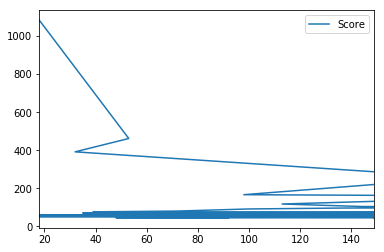

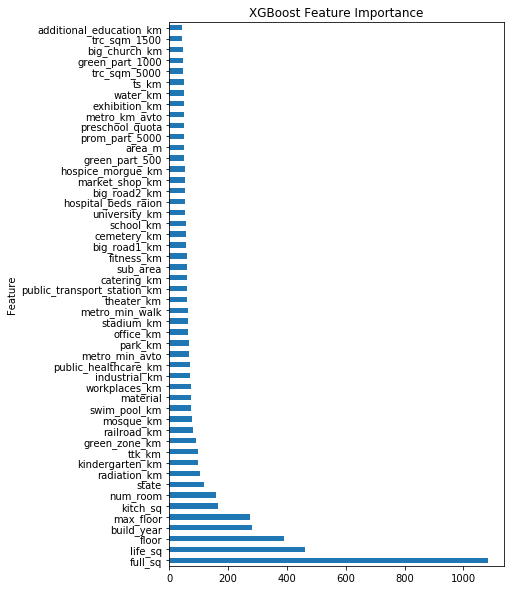

In [8]:
FImportance = get_feature_importance(model).iloc[0:50,]
plt.figure()
FImportance.plot()
FImportance.plot(kind='barh', x='Feature', y='Score', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.show()

In [9]:
FI_Acu = get_feature_importance(model)

In [10]:
for i in range(FI_Acu.shape[0]):
    if i ==0:
        FI_Acu.iloc[i,1] = FI_Acu.iloc[i,1]
    else:
        FI_Acu.iloc[i,1] = FI_Acu.iloc[i-1,1]+FI_Acu.iloc[i,1]

In [13]:
FI_Acu['Percentage'] = FI_Acu['Score']/max(FI_Acu['Score'])

In [15]:
FI_Acu.to_csv('Basemodel_FScore.csv',index=False)

In [10]:
label_train = train['price_doc']
train_f = train.drop(['timestamp','id','price_doc'],axis=1)
test_f = test.drop(['id','timestamp'],axis=1)
dtrain = xgb.DMatrix(train_f,label_train)
dtest = xgb.DMatrix(test_f)

In [16]:
model=xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= 360)

In [17]:
Prediction = model.predict(dtest)
test_id = test['id']
submission = pd.DataFrame({'id':test_id,'price_doc':Prediction})
#submission.to_csv('Submission_xgb6.csv')